# Digital Image Processing With Python
**Rawser Spicer**

----------------------------------------------------------

**https://github.com/rwspicer/geos622talk**

## Morphology

In [5]:
import gdal
import matplotlib.pyplot as plt
import numpy as np
from skimage import morphology

from bokeh.io import output_notebook
from bokeh.plotting import figure, show

dataset = gdal.Open('img/Fig0914(a)(licoln from penny).tif', gdal.GA_ReadOnly)

lincoln_base = dataset.GetRasterBand(1).ReadAsArray()

dataset = gdal.Open('img/Fig0940(a)(rice_image_with_intensity_gradient).tif', gdal.GA_ReadOnly)
rice_base = dataset.GetRasterBand(1).ReadAsArray()


## edge detection

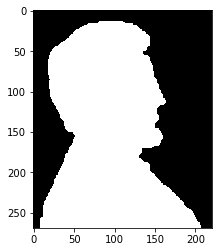

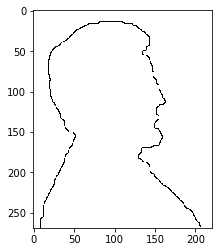

In [6]:
%matplotlib inline

plt.imshow(lincoln_base, cmap='binary')
plt.show()

dialate = morphology.binary_dilation(lincoln_base, np.ones([3,3]))

edge = dialate - lincoln_base 

plt.imshow(edge, cmap='binary')
plt.show()

## top hat 

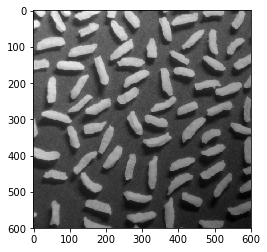

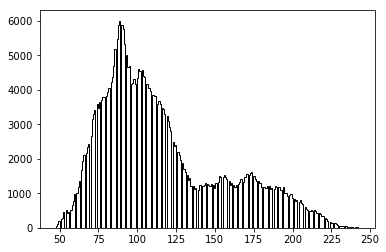

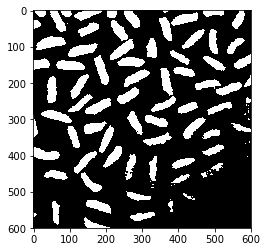

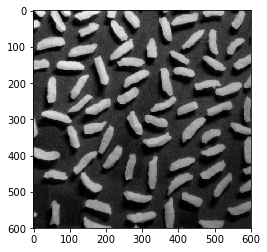

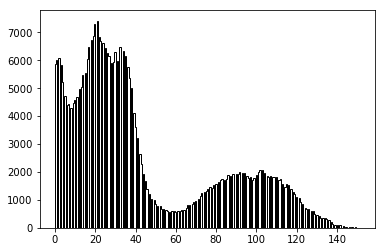

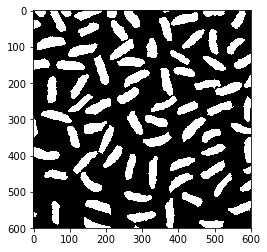

In [7]:
plt.imshow(rice_base, cmap='gray')
plt.show()

plt.hist(rice_base.ravel(), bins=256, histtype='step', color='black')
plt.show()
from copy import deepcopy

rice_t = deepcopy(rice_base)
t_val =  145
rice_t[rice_t >= t_val] = 255
rice_t[rice_t < t_val] = 0

plt.imshow(rice_t, cmap='gray')
plt.show()


rice_bg = morphology.opening(rice_base,np.ones([81,81]))

rice_th = rice_base - rice_bg 
plt.imshow(rice_th, cmap='gray')
plt.show()

plt.hist(rice_th.ravel(), bins=256, histtype='step', color='black')
plt.show()

rice_th_t = deepcopy(rice_th)
t_val =  58
rice_th_t[rice_th >= t_val] = 255
rice_th_t[rice_th < t_val] = 0

plt.imshow(rice_th_t, cmap='gray')
plt.show()


In [8]:
## display with bokeh

In [9]:
output_notebook()
p = figure(x_range=(0, 10), y_range=(0, 10))
#p.image(image=[rice_th], x=0, y=0, dw=10, dh=10, palette="Spectral11")
p.image(image=[rice_th[::-1]], x=0, y=0, dw=10, dh=10, palette="Greys256")
show(p)

Loading BokehJS ...